In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('/config/workspace/Dataset/diabetes.csv')

In [3]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())

In [7]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<Axes: >

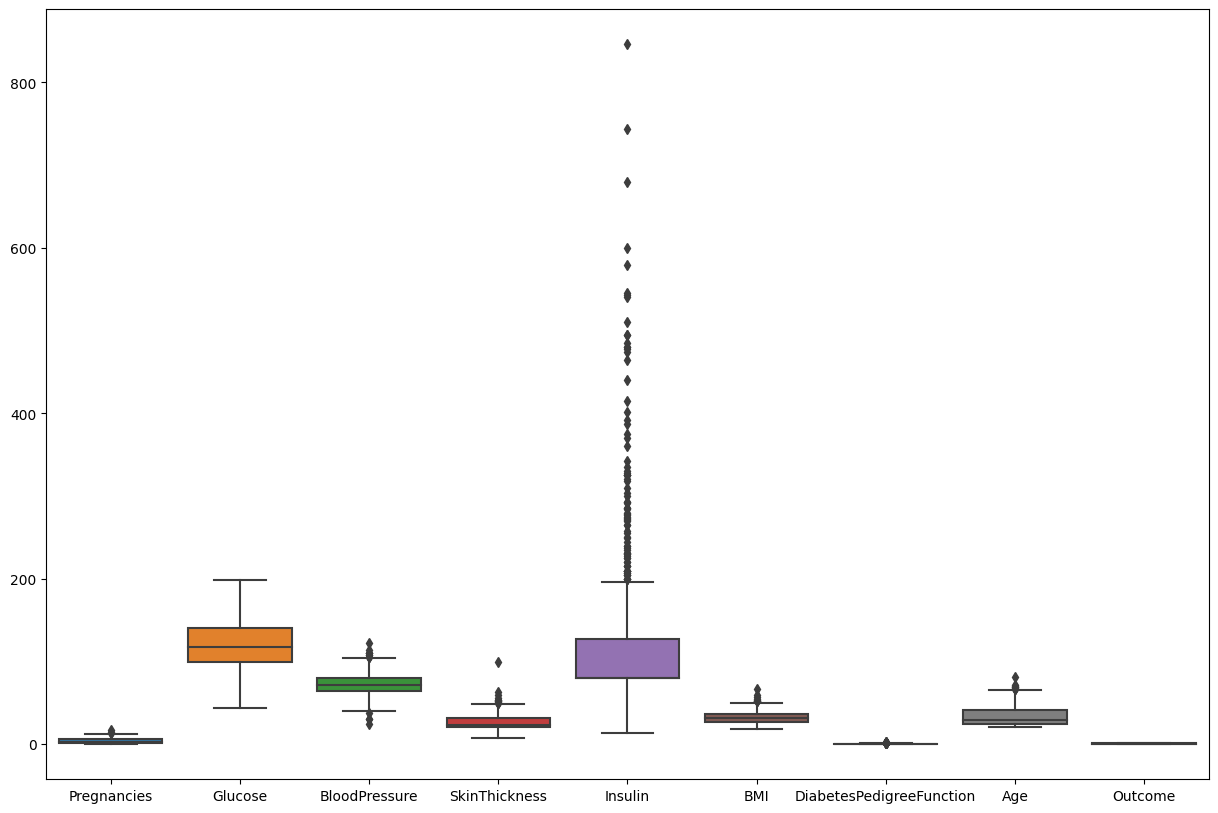

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, width=0.8, ax=ax, fliersize=5)

In [9]:
# diving the data into dependent and independet features
X = data.drop(columns=['Outcome'])
y = data.Outcome
data.shape

(768, 9)

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [13]:
import pickle
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    file = open('/config/workspace/Model/standardScaler.pkl', 'wb')
    pickle.dump(scaler, file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [14]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
# Hyperparameter Tuning
# gridsearch CV

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [18]:
parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-3, 3, 7),
    'solver':['newton-cg','lbfgs','liblinear']
}

In [19]:
logreg = LogisticRegression()
clf = GridSearchCV(
    log_reg,
    param_grid = parameters,
    scoring = 'accuracy',
    cv=10
)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [20]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [21]:
clf.best_score_

0.763793103448276

In [22]:
y_pred = clf.predict(X_test_scaled)

In [23]:
confusion_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confusion_matrix)

[[116  14]
 [ 26  36]]


In [24]:
true_positive = confusion_matrix[0][0]
false_positive = confusion_matrix[0][1]
false_negative = confusion_matrix[1][0]
true_negative = confusion_matrix[1][1]


In [25]:
print(true_positive, false_positive)
print(false_negative, true_negative)

116 14
26 36


In [26]:
Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
print("Accuracy is {}".format(Accuracy))

Accuracy is 0.7916666666666666


In [27]:
Precision = true_positive/(true_positive+false_positive)
print("Precision is {}".format(Precision))

Precision is 0.8923076923076924


In [28]:
Recall = true_positive/(true_positive+false_negative)
print("Recall is {}".format(Recall))

Recall is 0.8169014084507042


In [29]:
f1_score = 2*(Recall * Precision)/(Recall + Precision)
print("f1_score is {}".format(f1_score))

f1_score is 0.8529411764705882


In [30]:
import pickle
file = open('/config/workspace/Model/modelForPrediction.pkl','wb')
pickle.dump(log_reg, file)
file.close()